In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')


In [2]:
#Importing dataset 
Dataset= pd.read_csv('Dataset.csv')
#Checking datatypes
Dataset.dtypes


Sr                   int64
Date                object
Room Amount        float64
Dine In Amount       int64
Takeaway Amount      int64
Bar Amount           int64
dtype: object

In [3]:
#Coverting Date column format to d-m-y format
Dataset['Date'] = pd.to_datetime(Dataset.Date, format="%d-%m-%Y")
#Fetching top 5 vaules from the data
Dataset.head()


,Sr,Date,Room Amount,Dine In Amount,Takeaway Amount,Bar Amount
0,1,2013-09-01,0.0,53722,0,7760
1,2,2013-09-02,0.0,39137,0,25239
2,3,2013-09-03,0.0,597,0,4127
3,4,2013-09-04,0.0,0,0,2273
4,5,2013-09-05,0.0,4999,0,12505


In [4]:
#Aganing cheking type for date that it coverted to date from object
Dataset.dtypes


Sr                          int64
Date               datetime64[ns]
Room Amount               float64
Dine In Amount              int64
Takeaway Amount             int64
Bar Amount                  int64
dtype: object

In [5]:
#Augmented Dickey–Fuller test on Bar Sales
Bar_adt = Dataset['Bar Amount']
adfuller(Bar_adt)

(-2.824188219057194,
 0.05490085623240296,
 28,
 2973,
 {'1%': -3.432551464895929,
  '5%': -2.8625126635320393,
  '10%': -2.567287774919901},
 61332.795406456666)

In [6]:
# Creating new datafram contiang column of Date and bar amount
Data_Bar =Dataset[['Date','Bar Amount']]
#seting date cloumn as index
Data_Bar=Data_Bar.set_index('Date')
#Fetching top 5 rows
Data_Bar.head()


,Bar Amount
Date,
2013-09-01,7760
2013-09-02,25239
2013-09-03,4127
2013-09-04,2273
2013-09-05,12505


In [7]:
#setting asfreq as d
Data_Bar= Data_Bar.asfreq('D')

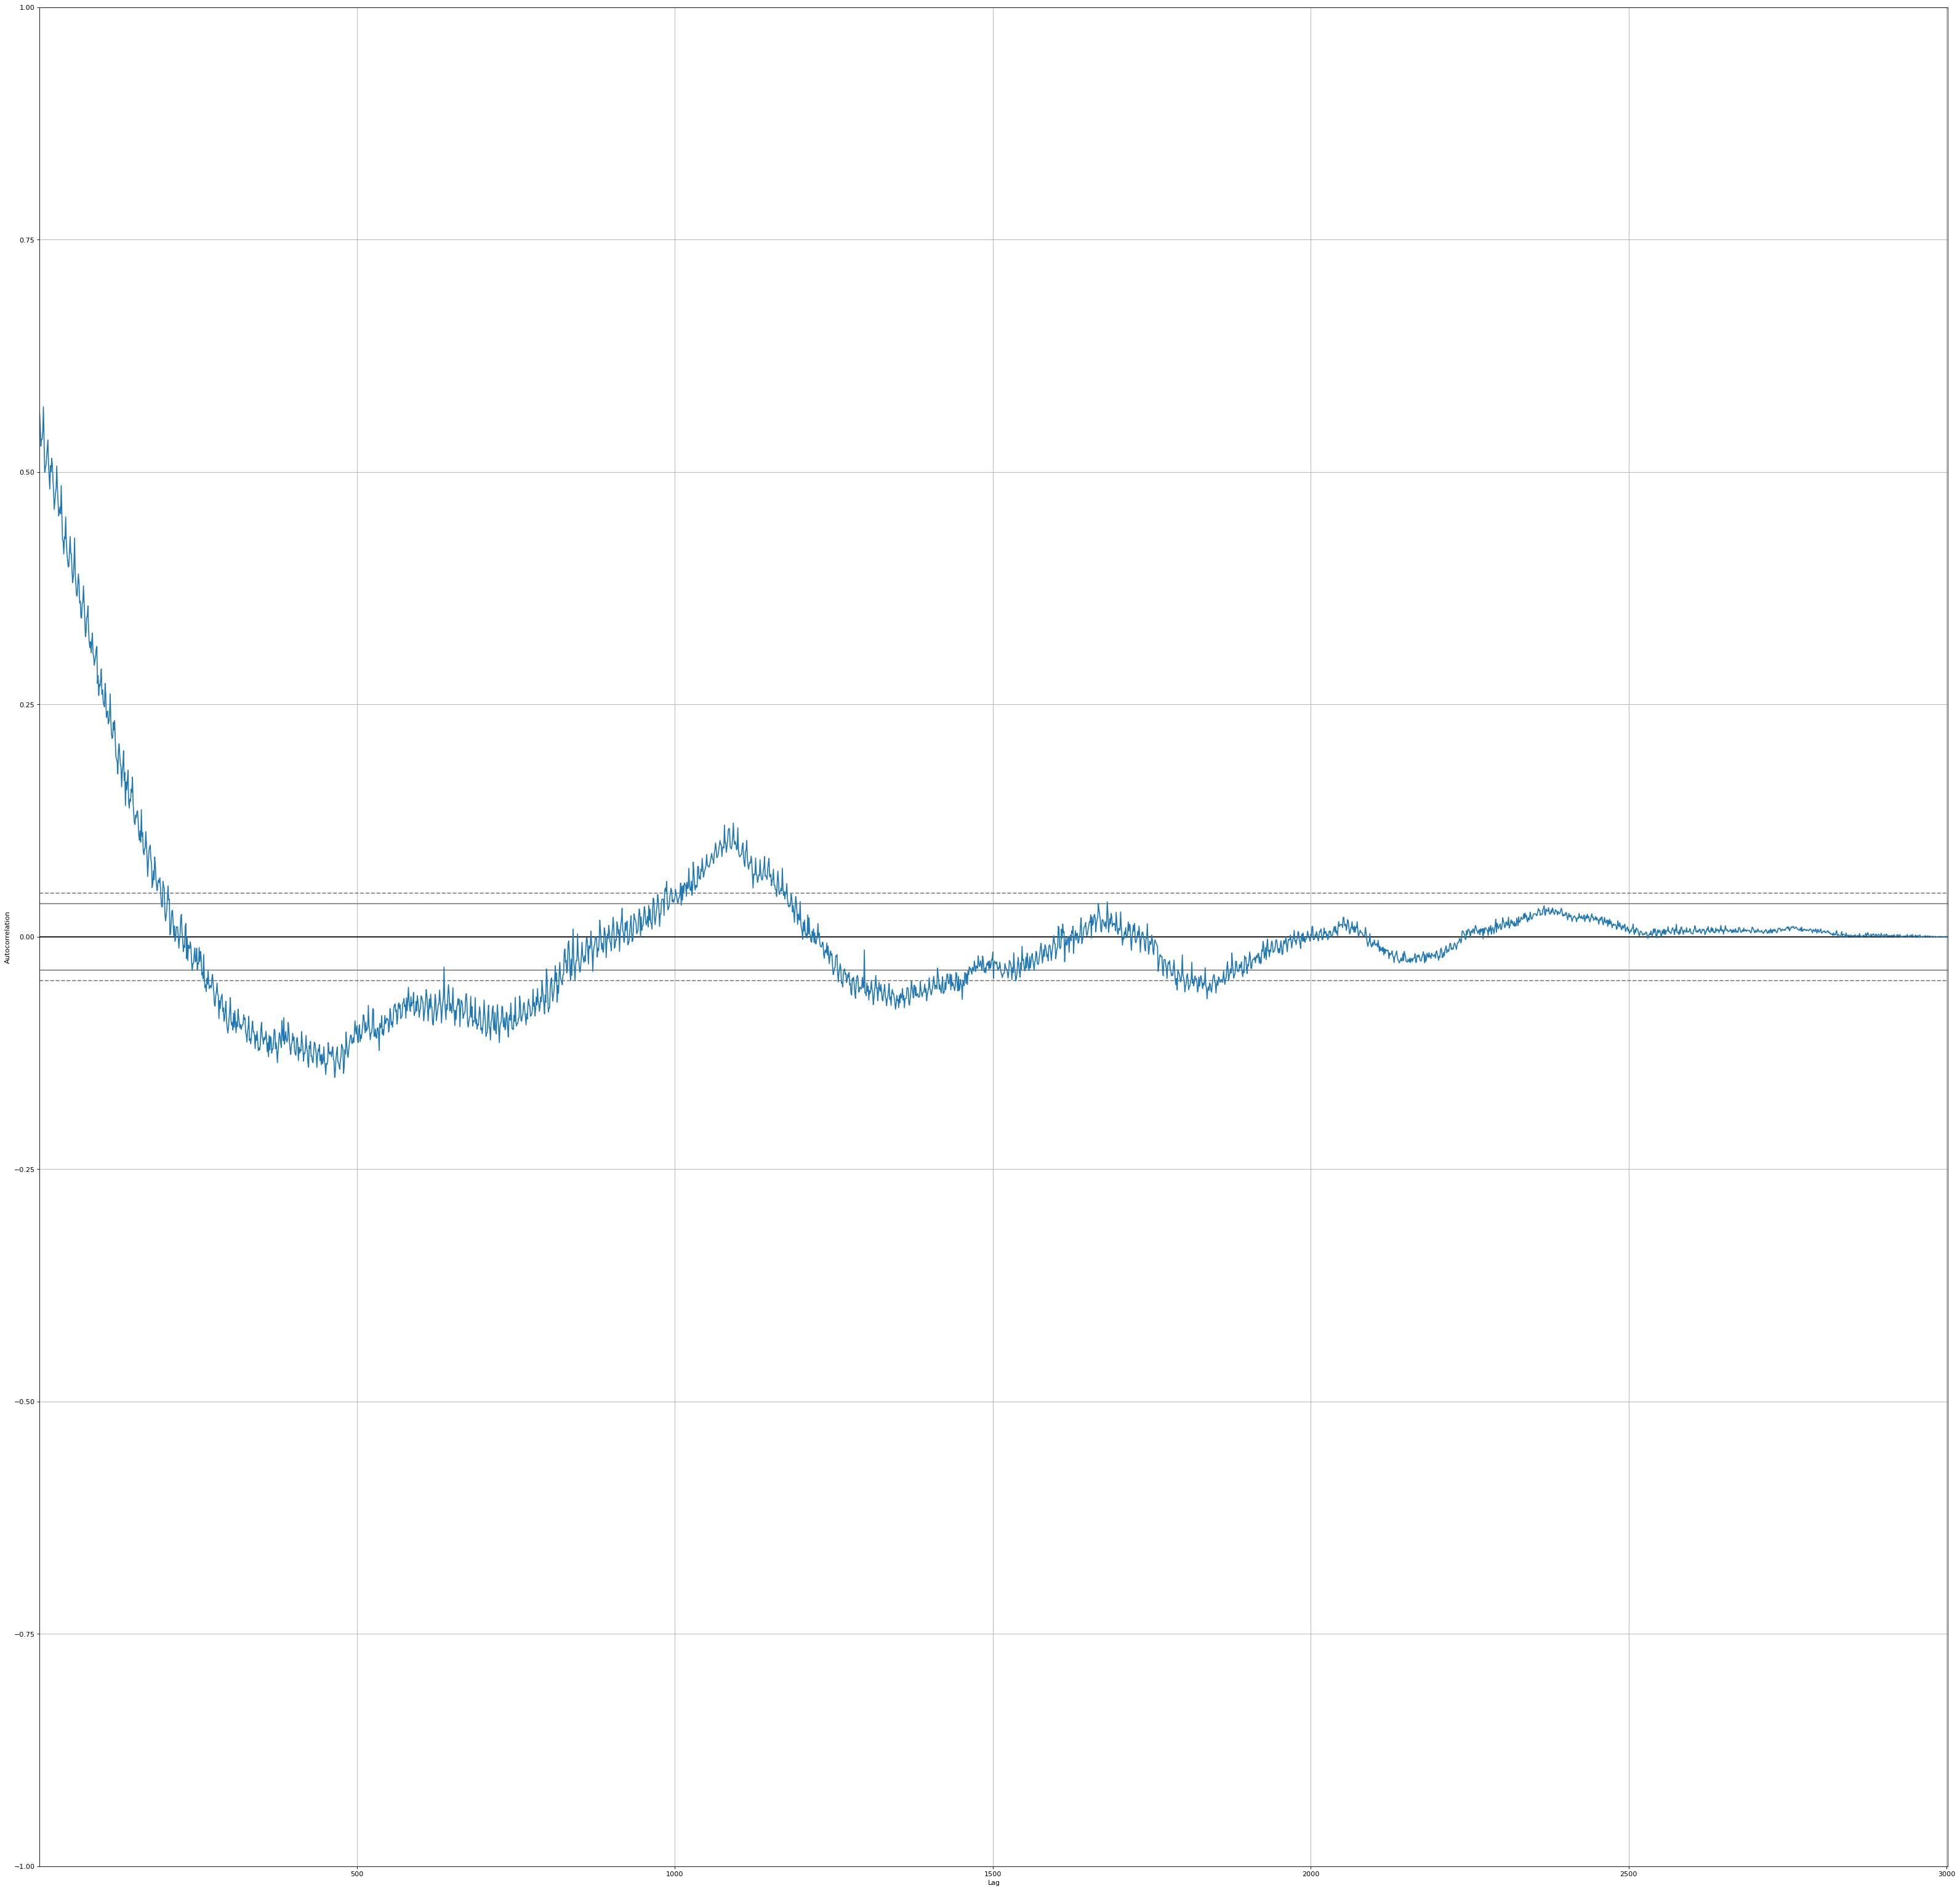

In [8]:
#ploting autocorrelation graph to find seasons
figure(figsize=(50,50),dpi=80)
autocorrelation_plot(Data_Bar)
plt.show()

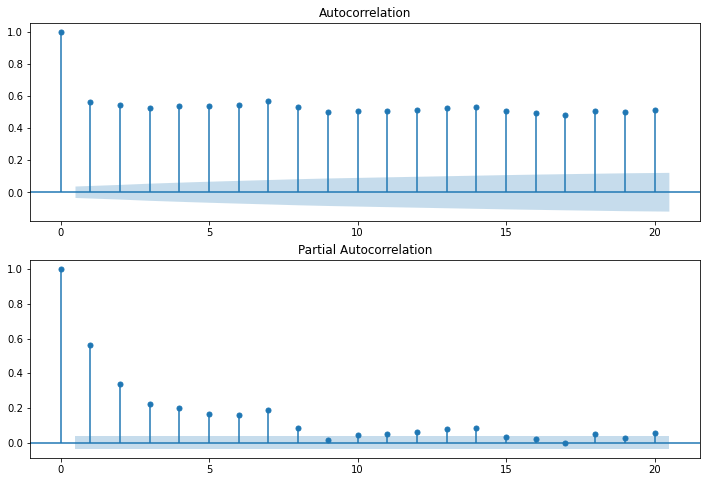

In [9]:
#plotting autocorrelation graph
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(Data_Bar,lags=20, ax=ax1)
#plotting partial correlation graph
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Data_Bar, lags=20, ax=ax2)


In [10]:
# spillting data for test and train set
Data_Bar_Train = Data_Bar.iloc[:len(Data_Bar) - 600]
Data_Bar_Test = Data_Bar.iloc[len(Data_Bar)-600:]
# creating new dataframe with half data for seasonal decompose
Data_Bar_S = Data_Bar.iloc[: len(Data_Bar) - 1501]


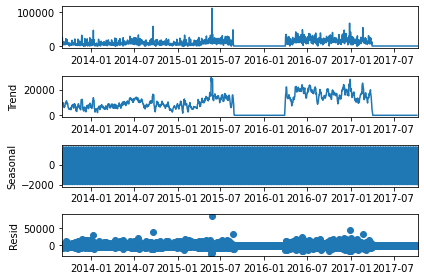

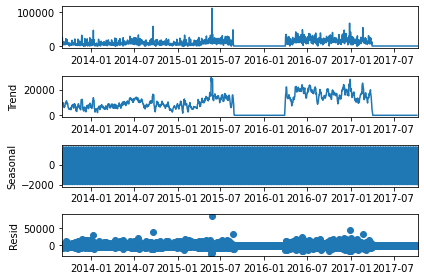

In [11]:
#plotting seasonal decompose chart
res = seasonal_decompose(Data_Bar_S)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(500,300))
res.plot()

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(Data_Bar,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:66007.14448522398
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:64715.42533787701
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:63683.738789112074
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:62321.43460411587
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:63305.75866342082
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:62574.107460102605
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:62808.65146954723
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:62321.71789991366
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:64875.42407971398
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:64247.178469607476
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:63638.28850131128
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:62179.33539538657
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:63974.22574098733
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:63641.07029140379
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:62830.16905382997
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:62395.31047514892
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:63601.492475171544
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:63352.78608521477
ARIMA(

In [14]:
# training arima model
Bar_Model_1= ARIMA(Data_Bar_Train, order=(1,1,1)).fit(disp=0)

In [15]:
# printing arima model results
Bar_Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Bar Amount   No. Observations:                 2401
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24952.452
Method:                       css-mle   S.D. of innovations           7889.040
Date:                Mon, 29 Nov 2021   AIC                          49912.904
Time:                        16:58:35   BIC                          49936.039
Sample:                    09-02-2013   HQIC                         49921.321
                         - 03-29-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0181     14.820     -0.001      0.999     -29.065      29.029
ar.L1.D.Bar Amount     0.0374      0.023      1.657      0.098      -0.007       0.082
ma.L1.D.Bar Amount    -0.9118      0.009    -96.280      0.000      -0.930      -0.893
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           26.7171           +0.0000j           26.7171            0.0000
MA.1            1.0967           +0.0000j            1.0967            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
#prediciting sales with arima model
Arima_Pred=Bar_Model_1.predict(start = Data_Bar_Train.shape[0],end= Data_Bar_Train.shape[0]+600)
Arima_Pred


2020-03-30    8025.206792
2020-03-31     300.359195
2020-04-01      11.224763
2020-04-02       0.402709
2020-04-03      -0.002352
                 ...     
2021-11-16      -0.018102
2021-11-17      -0.018102
2021-11-18      -0.018102
2021-11-19      -0.018102
2021-11-20      -0.018102
Freq: D, Length: 601, dtype: float64

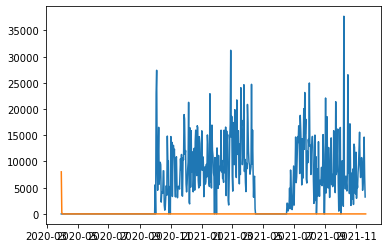

In [17]:
#plotting line garph actual vs predicted values
plt.plot(Data_Bar_Test)
plt.plot(Arima_Pred)

In [18]:
# training sarimax model
Bar_Model_2 = SARIMAX(Data_Bar_Train, order=(1, 1, 1),
                              seasonal_order=(0, 0, 1, 12)).fit(disp=0)


In [19]:
#sarimax model results
Bar_Model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Bar Amount   No. Observations:                 2402
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood              -24964.732
Date:                            Mon, 29 Nov 2021   AIC                          49937.464
Time:                                    16:58:36   BIC                          49960.599
Sample:                                09-01-2013   HQIC                         49945.881
                                     - 03-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0371      0.016      2.280      0.023       0.005       0.069
ma.L1         -0.9116      0.009   -104.425      0.000      -0.929      -0.894
ma.S.L12      -0.0049      0.020     -0.246      0.805      -0.044       0.034
sigma2      7.207e+07   1.58e-10   4.56e+17      0.000    7.21e+07    7.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            493024.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             4.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.9e+31. Standard errors may be unstable.
"""

In [20]:
# prediciting sales with sarima model
Sarima_Pred = Bar_Model_2.predict(
    start=Data_Bar_Train.shape[0], end=Data_Bar_Train.shape[0]+600)
Sarima_Pred


2020-03-30    7994.620387
2020-03-31    8340.144620
2020-04-01    8405.728344
2020-04-02    8418.342148
2020-04-03    8418.254064
                 ...     
2021-11-16    8377.887715
2021-11-17    8377.887715
2021-11-18    8377.887715
2021-11-19    8377.887715
2021-11-20    8377.887715
Freq: D, Name: predicted_mean, Length: 601, dtype: float64

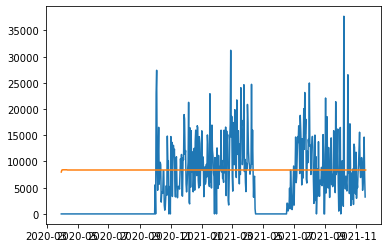

In [21]:
#plotting line garph actual vs predicted values
plt.plot(Data_Bar_Test)
plt.plot(Sarima_Pred)


In [22]:
# training Exponential Smoothing model
Bar_Model_3 = ExponentialSmoothing(Data_Bar_Train,trend="add",seasonal="add",seasonal_periods=365).fit()


In [23]:
#Exponential Smoothing model results
Bar_Model_3.summary()


Dep. Variable:,Bar Amount,No. Observations:,2402
Model:,ExponentialSmoothing,SSE,173889651545.956
Optimized:,True,AIC,44208.507
Trend:,Additive,BIC,46342.824
Seasonal:,Additive,AICC,44344.479
Seasonal Periods:,365,Date:,"Mon, 29 Nov 2021"
Box-Cox:,False,Time:,16:58:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0001,beta,True


In [24]:
# prediciting sales with Exponential Smoothing model
ES_Pred = Bar_Model_3.predict(
    start=Data_Bar_Train.shape[0], end=Data_Bar_Train.shape[0]+600)
ES_Pred


2020-03-30    10827.970553
2020-03-31    11566.669141
2020-04-01     8027.860034
2020-04-02    14347.044929
2020-04-03    10302.941252
                  ...     
2021-11-16    13559.727962
2021-11-17    12858.495218
2021-11-18     7893.639398
2021-11-19     8823.083038
2021-11-20    10807.542170
Freq: D, Length: 601, dtype: float64

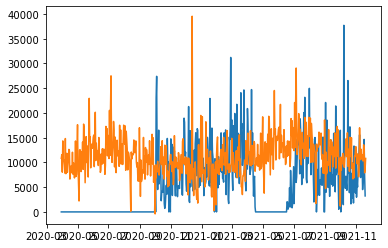

In [25]:
#plotting line garph actual vs predicted values
plt.plot(Data_Bar_Test)
plt.plot(ES_Pred)
